In [1]:
!nvidia-smi

Thu Jul  3 14:58:30 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   35C    P8             11W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

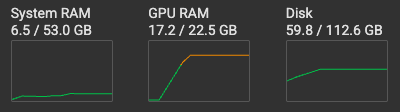

In [23]:
# Resource usage

In [ ]:
%pip install -Uqqq pip --progress-bar off
%pip install -qqq transformers==4.53.0 --progress-bar off
%pip install -qqq torch==2.7.1 --progress-bar off
%pip install -qqq torchvision==0.22.1 --progress-bar off
%pip install -qqq rich==14.0.0 --progress-bar off

In [88]:
# @title Animation code
import time
from IPython.display import display, HTML, clear_output
import math


def generate_border_highlight_html(
    previous_items, current_items, frame_number=None, total_frames=None
):
    """
    Generates HTML that highlights changed items ONLY by flashing their border.
    This version removes all other animations (scaling, fading) for a cleaner look.

    Args:
        previous_items (list): The list of items from the previous frame.
        current_items (list): The list of items for the current frame.

    Returns:
        str: A string containing the complete HTML for the animation.
    """
    item_count = len(current_items)
    if item_count == 0:
        return "<div>No items to display.</div>"

    num_columns = math.ceil(math.sqrt(item_count))

    # --- Simplified CSS for Border Highlight Only ---
    css_style = f"""
    <style>
        /* The ONLY animation: a simple border color flash. */
        @keyframes border-flash {{
            from {{ border-color: #7aa2f7; }} /* Bright accent color */
            to   {{ border-color: #414868; }} /* Default, subtle border color */
        }}

        .demo-wrapper {{
            background-color: #1a1b26;
            color: #c0caf5;
            font-family: 'Segoe UI', 'Roboto', sans-serif;
            padding: 25px;
            border-radius: 12px;
            overflow: hidden;
        }}
        .frame-header {{
            color: #7aa2f7;
            border-bottom: 1px solid #3b4261;
            padding-bottom: 10px;
            margin-bottom: 20px;
            font-weight: 500;
        }}

        .grid-container {{
            display: grid;
            grid-template-columns: repeat({num_columns}, minmax(0, 1fr));
            gap: 12px;
            padding: 20px;
            border-radius: 8px;
            background-color: #24283b;
            border: 1px solid #3b4261;
            box-shadow: 0 10px 30px rgba(0, 0, 0, 0.3);
        }}

        /* Each cell has this wrapper to ensure uniform height. */
        .grid-cell {{
            position: relative;
            aspect-ratio: 3 / 1;
        }}

        /* The visual token element. */
        .grid-item {{
            position: absolute;
            top: 0; left: 0; width: 100%; height: 100%;
            display: flex;
            align-items: center;
            justify-content: center;

            color: #a9b1d6;
            font-family: 'Fira Code', 'Consolas', monospace;
            padding: 6px 12px;
            box-sizing: border-box;
            border-radius: 5px;
            white-space: nowrap;
            text-align: center;
            background-color: #414868;
            /* Default state has a subtle border */
            border: 2px solid #414868;
        }}

        /* The class applied to changed items to trigger the animation. */
        .item-changed {{
            animation: border-flash 1.0s ease-out forwards;
        }}
    </style>
    """

    # --- Simplified HTML Generation ---
    grid_cells_html = []
    is_first_frame = previous_items is None

    for i in range(item_count):
        current_token = current_items[i]
        previous_token = None if is_first_frame else previous_items[i]

        # Determine the CSS class based on whether the item changed.
        item_class = "item-changed" if current_token != previous_token else ""

        # Create the simple inner HTML.
        inner_cell_html = f'<div class="grid-item {item_class}">{current_token}</div>'

        # ALWAYS wrap in a .grid-cell to maintain uniform height.
        grid_cells_html.append(f'<div class="grid-cell">{inner_cell_html}</div>')

    final_grid_html = "".join(grid_cells_html)
    header_html = f'<h2 class="frame-header">Diffusion Generation  |  Frame: {frame_number} / {total_frames}</h2>'

    full_html = f"""
    {css_style}
    <div class="demo-wrapper">
        {header_html}
        <div class="grid-container">
            {final_grid_html}
        </div>
    </div>
    """
    return full_html


# The animation runner function calls the new, simplified generator.
def animate_token_grids(list_of_lists, frame_duration=1.0):
    previous_items = None
    total_frames = len(list_of_lists)
    for i, current_items in enumerate(list_of_lists):
        clear_output(wait=True)
        html_content = generate_border_highlight_html(
            previous_items, current_items, frame_number=i + 1, total_frames=total_frames
        )
        display(HTML(html_content))
        previous_items = current_items
        time.sleep(frame_duration)
    print("\nAnimation complete.")

In [1]:
import torch
from transformers import AutoModel, AutoTokenizer
from rich.console import Console
from rich.markdown import Markdown

DEVICE = "cuda"
MODEL_ID = "apple/DiffuCoder-7B-Instruct"

In [2]:
model = AutoModel.from_pretrained(
    MODEL_ID, torch_dtype=torch.bfloat16, trust_remote_code=True
)
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID, trust_remote_code=True)
model = model.to(DEVICE).eval()

config.json:   0%|          | 0.00/875 [00:00<?, ?B/s]

configuration_dream.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/apple/DiffuCoder-7B-Instruct:
- configuration_dream.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_dream.py: 0.00B [00:00, ?B/s]

generation_utils.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/apple/DiffuCoder-7B-Instruct:
- generation_utils.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/apple/DiffuCoder-7B-Instruct:
- modeling_dream.py
- generation_utils.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.33G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.88G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.09G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/326 [00:00<?, ?B/s]

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenization_dream.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/apple/DiffuCoder-7B-Instruct:
- tokenization_dream.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/681 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/803 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

In [2]:
print(
    tokenizer.decode(model.generation_config.eos_token_id),
    tokenizer.decode(model.config.eos_token_id),
)

<|endoftext|> <|endoftext|>


In [3]:
visualization_token_states = []


def my_generation_tokens_hook(step, x, logits):
    visualization_token_states.append(x[0].clone().cpu())
    return x

In [6]:
messages = [
    {
        "role": "user",
        "content": "Write a recursive Python function that calculates the nth Fibonacci number",
    }
]

encoding = tokenizer.apply_chat_template(
    messages, return_tensors="pt", return_dict=True, add_generation_prompt=True
)

In [11]:
encoding.input_ids

tensor([[151644,   8948,    198,   2610,    525,    264,  10950,  17847,     13,
         151645,    198, 151644,    872,    198,   7985,    264,  30819,  13027,
            729,    429,  47417,    279,  55129,  79683,   1372, 151645,    198,
         151644,  77091,    198]])

In [13]:
print(tokenizer.decode(encoding.input_ids[0]))

<|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
Write a recursive Python function that calculates the nth Fibonacci number<|im_end|>
<|im_start|>assistant



In [78]:
%%time
input_ids = encoding.input_ids.to(device=DEVICE)
attention_mask = encoding.attention_mask.to(device=DEVICE)

output = model.diffusion_generate(
    input_ids,
    attention_mask=attention_mask,
    max_new_tokens=64,
    output_history=True,
    return_dict_in_generate=True,
    steps=16,
    temperature=0.2,
    top_p=0.95,
    alg="entropy",
    alg_temp=0.0,
    generation_tokens_hook_func=my_generation_tokens_hook,
)

CPU times: user 1.33 s, sys: 0 ns, total: 1.33 s
Wall time: 1.32 s


In [81]:
len(visualization_token_states)

26

In [82]:
visualization_token_states[0].shape

torch.Size([94])

In [83]:
tokens = [
    [tokenizer.decode(tok_id) for tok_id in token_ids]
    for token_ids in visualization_token_states
]

In [84]:
len(tokens)

26

In [85]:
tokens[0][:10]

['<|im_start|>',
 'system',
 '\n',
 'You',
 ' are',
 ' a',
 ' helpful',
 ' assistant',
 '.',
 '<|im_end|>']

In [89]:
animate_token_grids(tokens, frame_duration=1)


Animation complete.


In [109]:
print(tokenizer.decode(output.sequences[0]))

<|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
Write a recursive Python function that calculates the nth Fibonacci number<|im_end|>
<|im_start|>assistant
Here is a Python function that calculates the nth Fibonacci number using recursion:

```python
def fibonacci(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)
```<|im_end|>



In [12]:
len(visualization_token_states)

9

In [108]:
input_token_len = len(input_ids[0])
result = tokenizer.decode(
    output.sequences[0][input_token_len:], skip_special_tokens=True
)

console = Console()
console.print(Markdown(result))

Here is a Python function that calculates the nth Fibonacci number using recursion:                                

                                                                                                                   
 def fibonacci(n):                                                                                                 
     if n <= 0:                                                                                                    
         return 0                                                                                                  
     elif n == 1:                                                                                                  
         return 1                                                                                                  
     else:                                                                                                         
         return fibonacci(n-1) + fibonacci(n-2)                                                                    
                                                                                                                   

In [4]:
def fibonacci(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)


print(fibonacci(10))

55


In [6]:
def generate_response(prompt: str, max_new_tokens: int = 512, steps: int = 512) -> str:
    messages = [{"role": "user", "content": prompt}]

    encoding = tokenizer.apply_chat_template(
        messages, return_tensors="pt", return_dict=True, add_generation_prompt=True
    )

    input_ids = encoding.input_ids.to(device=DEVICE)
    attention_mask = encoding.attention_mask.to(device=DEVICE)

    output = model.diffusion_generate(
        input_ids,
        attention_mask=attention_mask,
        max_new_tokens=max_new_tokens,
        output_history=True,
        return_dict_in_generate=True,
        steps=steps,
        temperature=0.2,
        top_p=0.95,
        alg="entropy",
        alg_temp=0.0,
    )

    input_token_len = len(input_ids[0])
    return tokenizer.decode(
        output.sequences[0][input_token_len:], skip_special_tokens=True
    )


def print_response(text: str):
    console = Console()
    console.print(Markdown(text))

## Data Structures

In [129]:
%%time
prompt = """
Write a Python function find_most_frequent(items) that takes a list of items (which can be numbers or strings).
The function should return the item that appears most frequently in the list.
If there is a tie for the most frequent item, return any one of the items that are tied.
If the input list is empty, the function should return None.
"""
response = generate_response(prompt)

CPU times: user 4min 25s, sys: 0 ns, total: 4min 25s
Wall time: 4min 24s


In [130]:
print_response(response)

Here is the code to solve this problem:                                                                            

                                                                                                                   
 from collections import Counter                                                                                   
                                                                                                                   
 def find_most_frequent(items):                                                                                    
     if not items:                                                                                                 
         return None                                                                                               
     count = Counter(items)                                                                                        
     max_count = max(count.values())                                                                               
     most_common = [item for item, freq in count.items() if freq == max_count]                                     
     return most_common[0]                                                                                         
                                                                                                                   
 # Test cases                                                                                                      
 assert find_most_frequent([1, 2, 2, 3, 3, 3]) == 3                                                                
 assert find_most_frequent(['apple', 'banana', 'apple', 'cherry', 'banana', 'banana']) == 'banana'                 
 assert find_most_frequent([1, 1, 2, 2, 3, 3, 4, 4, 4, 4, 4]) == 4                                                 
 assert find_most_frequent([]) == None                                                                             
                                                                                                                   

In [14]:
from collections import Counter


def find_most_frequent(items):
    if not items:
        return None
    count = Counter(items)
    max_count = max(count.values())
    most_common = [item for item, freq in count.items() if freq == max_count]
    return most_common[0]

In [15]:
result_tie_1 = find_most_frequent([1, 1, 2, 2, 3])
assert result_tie_1 in {1, 2}, (
    f"Test Failed: Tie between 1 and 2. Expected 1 or 2, but got {result_tie_1}."
)

result_tie_2 = find_most_frequent(["a", "b", "c"])  # All items are tied
assert result_tie_2 in {"a", "b", "c"}, (
    f"Test Failed: All items tied. Expected 'a', 'b', or 'c', but got {result_tie_2}."
)

# 3. Test with mixed data types (integers and strings)
# The function must handle different but comparable types correctly.
assert find_most_frequent([1, "a", 1, "b", "a", "a"]) == "a", (
    "Test Failed: Mixed types with string as most frequent."
)
assert find_most_frequent(["x", 9, "y", 9, "z", 9]) == 9, (
    "Test Failed: Mixed types with integer as most frequent."
)

# 4. Test distinguishing between numbers and strings that look like numbers
# '1' (string) is different from 1 (integer).
assert find_most_frequent([1, "1", 1, 2, "1", "1"]) == "1", (
    "Test Failed: Should identify string '1' as most frequent."
)

# 5. Test with None as a frequent item
# None is a valid, hashable object and should be counted like any other item.
assert find_most_frequent([None, 1, 2, None, 1, None]) is None, (
    "Test Failed: Should handle None as the most frequent item."
)

print("All tests passed")

All tests passed


## Pythonic Code and Data Processing

In [7]:
%%time
prompt = """
You are given a list of dictionaries, where each dictionary represents a product.
For example:
products = [{'name': 'Laptop', 'price': 1200, 'in_stock': True}, {'name': 'Mouse', 'price': 25, 'in_stock': False}, ...]

Write a Python function get_available_product_names(products) that takes this list and returns a new list containing
only the names of the products that are in_stock. The returned list of names must be sorted alphabetically.

The implementation must use a list comprehension.
"""
response = generate_response(prompt)

CPU times: user 2min 10s, sys: 329 ms, total: 2min 10s
Wall time: 2min 10s


In [8]:
print_response(response)

Here is a Python function that solves the problem:                                                                 

                                                                                                                   
 def get_available_product_names(products):                                                                        
     return sorted(product['name'] for product in products if product['in_stock'])                                 
                                                                                                                   

This function uses a list comprehension to create a new list of product names that are in stock ('in_stock' is     
True). The sorted() function is then used to sort the list of names alphabetically.

In [10]:
def get_available_product_names(products):
    return sorted(product["name"] for product in products if product["in_stock"])

In [13]:
# 1. Test the primary edge case: an empty list of products
# The function should return an empty list.
assert get_available_product_names([]) == [], (
    "Test Failed: Should return an empty list for an empty input."
)

# 2. Test when no products are in stock
# The function should correctly filter all items and return an empty list.
products_none_in_stock = [
    {"name": "Monitor", "price": 300, "in_stock": False},
    {"name": "Keyboard", "price": 75, "in_stock": False},
]
assert get_available_product_names(products_none_in_stock) == [], (
    "Test Failed: Should return an empty list when no products are in stock."
)

# 3. Test when all products are in stock
# The function should return all product names, sorted alphabetically.
products_all_in_stock = [
    {"name": "Webcam", "price": 80, "in_stock": True},
    {"name": "Mouse", "price": 25, "in_stock": True},
    {"name": "Adapter", "price": 15, "in_stock": True},
]
expected_all_sorted = ["Adapter", "Mouse", "Webcam"]
assert get_available_product_names(products_all_in_stock) == expected_all_sorted, (
    f"Test Failed: Incorrect sorting or filtering when all items are in stock. Expected {expected_all_sorted}."
)

# 4. Test the sorting logic with a mixed list
# The primary purpose is to ensure the output is always alphabetically sorted, regardless of input order.
mixed_products = [
    {"name": "Laptop", "price": 1200, "in_stock": True},
    {"name": "Mouse", "price": 25, "in_stock": False},
    {"name": "Docking Station", "price": 150, "in_stock": True},
    {"name": "Cable", "price": 10, "in_stock": True},
]
expected_mixed_sorted = ["Cable", "Docking Station", "Laptop"]
assert get_available_product_names(mixed_products) == expected_mixed_sorted, (
    f"Test Failed: Sorting is incorrect. Expected {expected_mixed_sorted}."
)

# 5. Test with duplicate product names (one in stock, one not)
# This ensures it only includes the one that is actually in stock.
duplicate_name_products = [
    {"name": "Headphones", "price": 150, "in_stock": False},
    {"name": "Microphone", "price": 100, "in_stock": True},
    {"name": "Headphones", "price": 200, "in_stock": True},
]
expected_duplicates_sorted = ["Headphones", "Microphone"]
assert (
    get_available_product_names(duplicate_name_products) == expected_duplicates_sorted
), "Test Failed: Handling of duplicate names with different stock statuses."

# 6. Test with dictionaries containing extra, irrelevant keys
# A robust function should only care about 'name' and 'in_stock', ignoring other data.
products_with_extra_keys = [
    {
        "name": "Chair",
        "price": 180,
        "in_stock": True,
        "color": "black",
        "SKU": "CH-001",
    },
    {"name": "Desk", "price": 400, "in_stock": False, "material": "wood"},
]
assert get_available_product_names(products_with_extra_keys) == ["Chair"], (
    "Test Failed: Should ignore extra keys in dictionaries."
)

# 7. Test with a single product in the list
assert get_available_product_names([{"name": "Pen", "price": 2, "in_stock": True}]) == [
    "Pen"
], "Test Failed: List with a single available product."
assert (
    get_available_product_names([{"name": "Stapler", "price": 12, "in_stock": False}])
    == []
), "Test Failed: List with a single unavailable product."

print("All tests passed")

All tests passed
